In [1]:
print("GET ON WiTH FUNKOT")
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import mglearn

GET ON WiTH FUNKOT


# 降维、特征提取与流形学习

## 主成分分析(PCA)

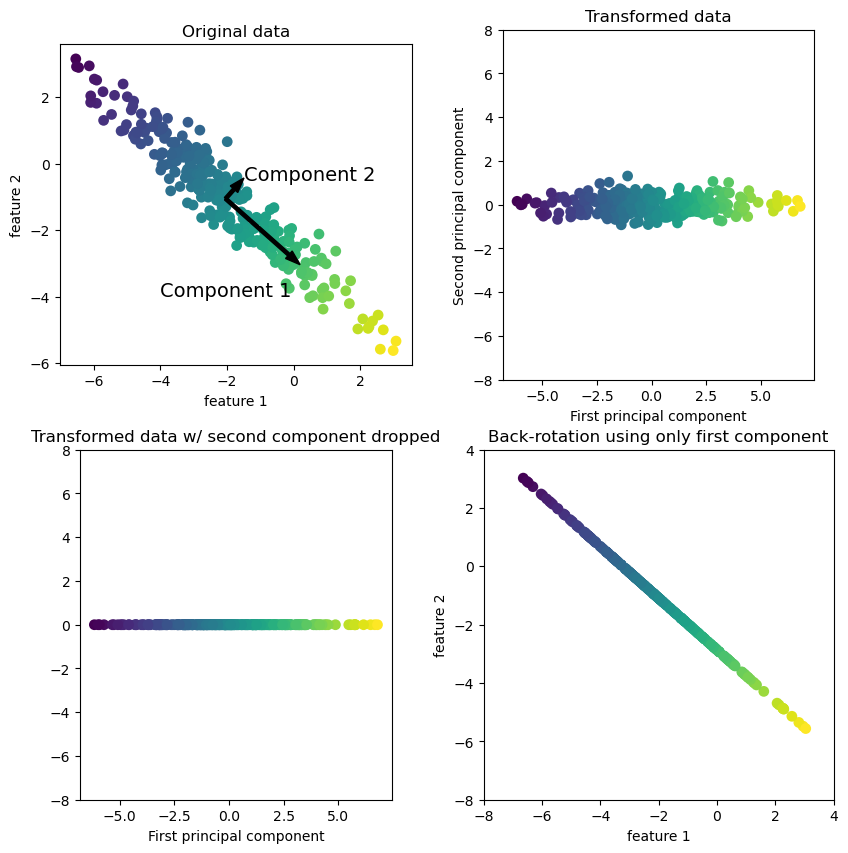

In [2]:
#PCA对一个模拟二维数据集的作用
mglearn.plots.plot_pca_illustration()

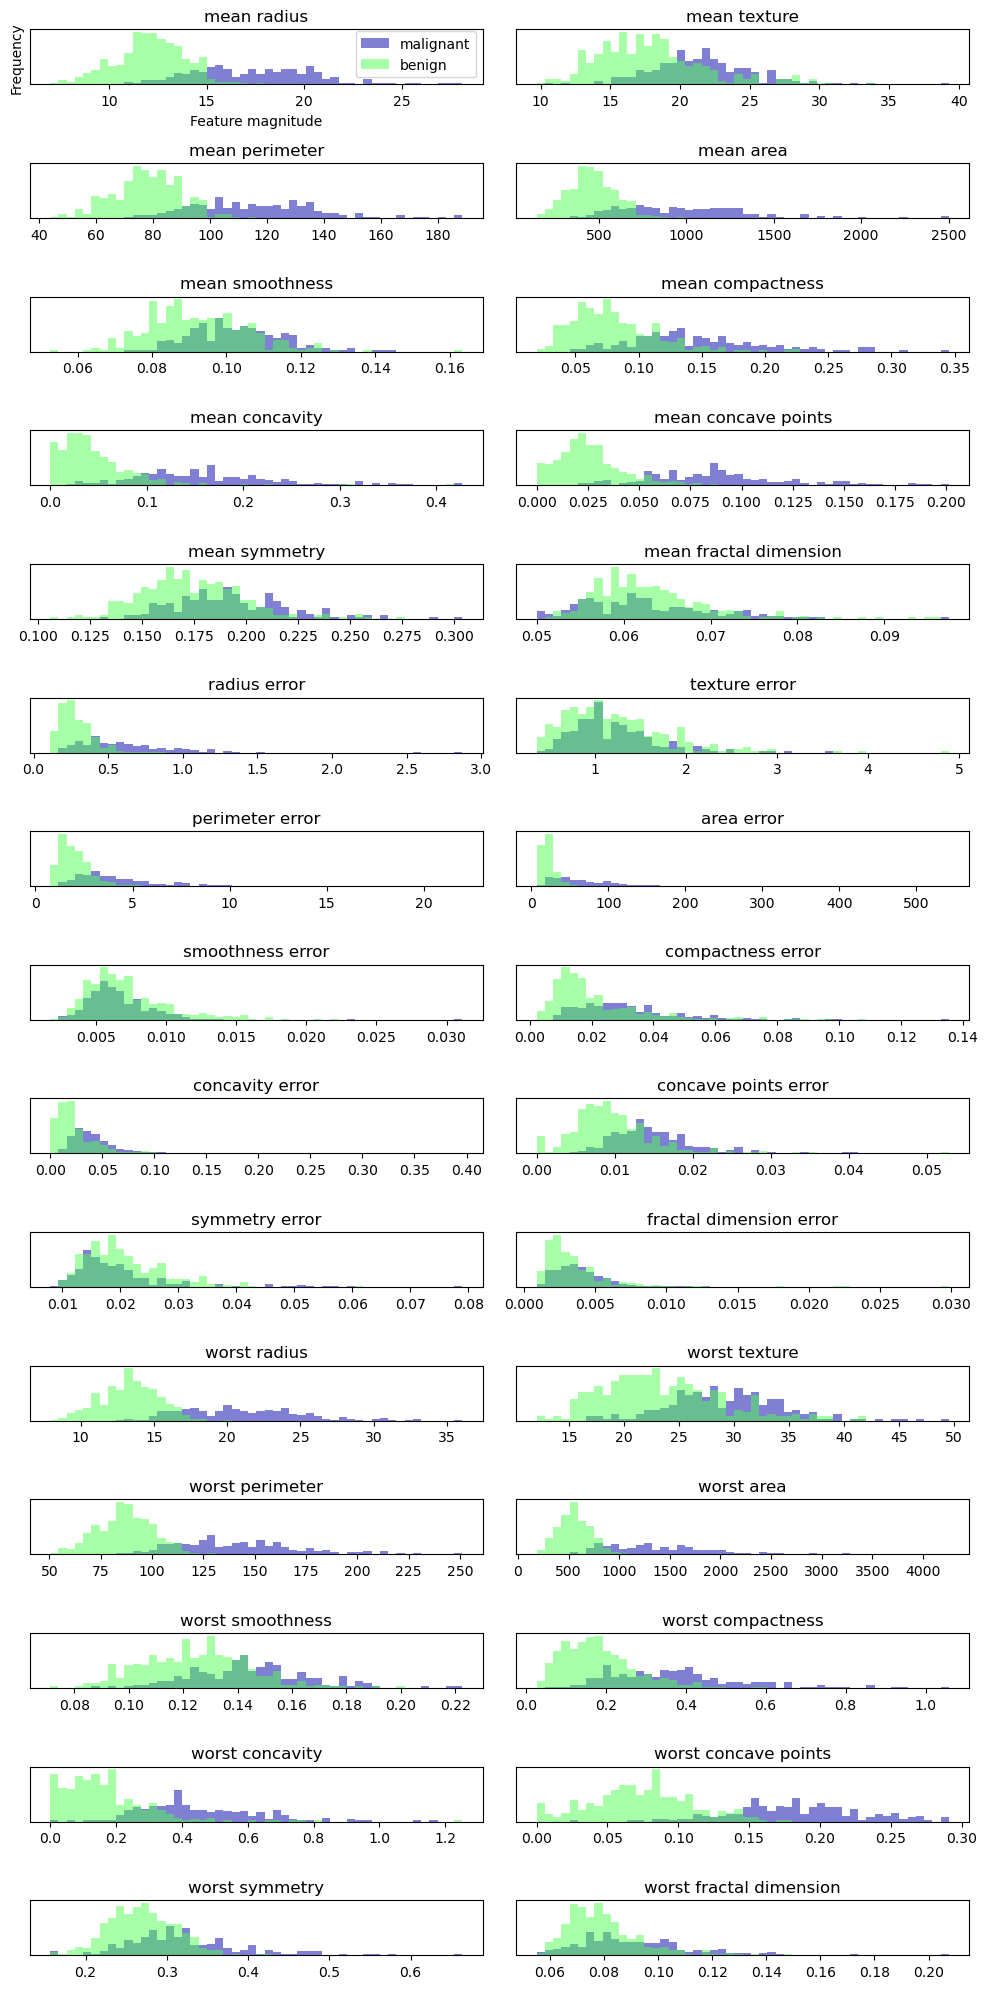

In [3]:
#PCA应用于cancer数据集并可视化
#将高维数据可视化
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#对每个特征分别计算两个类别的直方图
fig,axes = plt.subplots(15,2,figsize=(10,20))
ax = axes.ravel()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
#保留数据的前两个主成分
pca = PCA(n_components=2)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

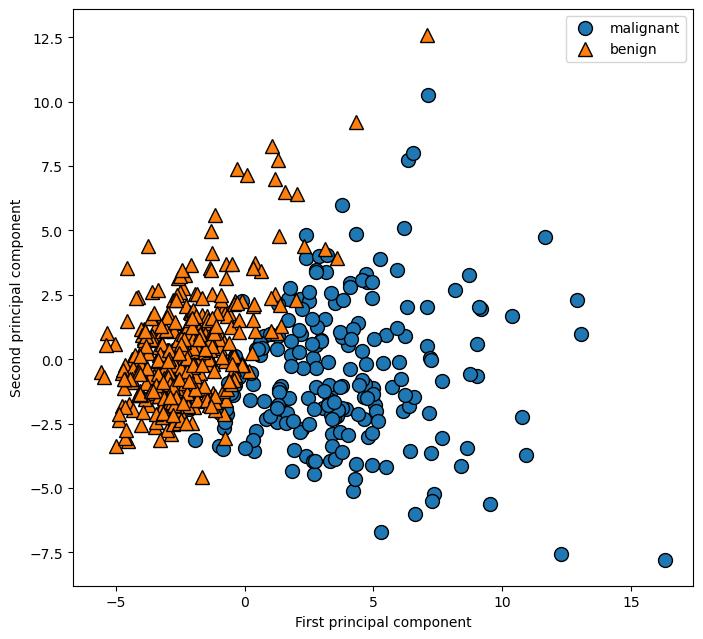

In [6]:
#利用前两个主成分画散点图
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [7]:
#一行一个主成分
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

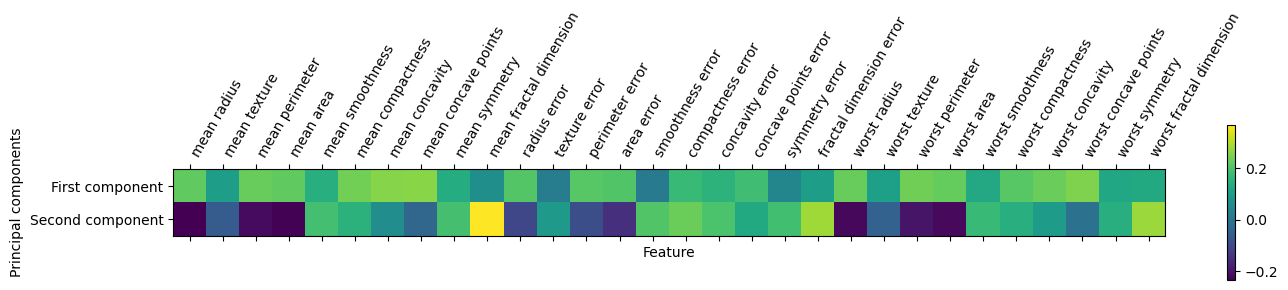

In [9]:
#用热图将系数可视化
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [20]:
#两个主成分向量垂直，点积为0
p0 = pca.components_[0]
p1 = pca.components_[1]
print("p0 * p1: {}".format(p0*p1))
print("p0 . p1: {:.3f}".format(np.array(p0*p1).sum()))

p0 * p1: [-0.0511919  -0.00619299 -0.04896178 -0.05106679  0.0265378   0.03634544
  0.01554676 -0.00906923  0.02629991  0.02359402 -0.0217415   0.00156817
 -0.01890463 -0.03089555  0.00297067  0.03965326  0.03028903  0.02390324
  0.00781325  0.02872857 -0.05012879 -0.00474994 -0.04729917 -0.04932577
  0.02204678  0.03016833  0.02241101 -0.00207162  0.01743811  0.03628532]
p0 . p1: -0.000


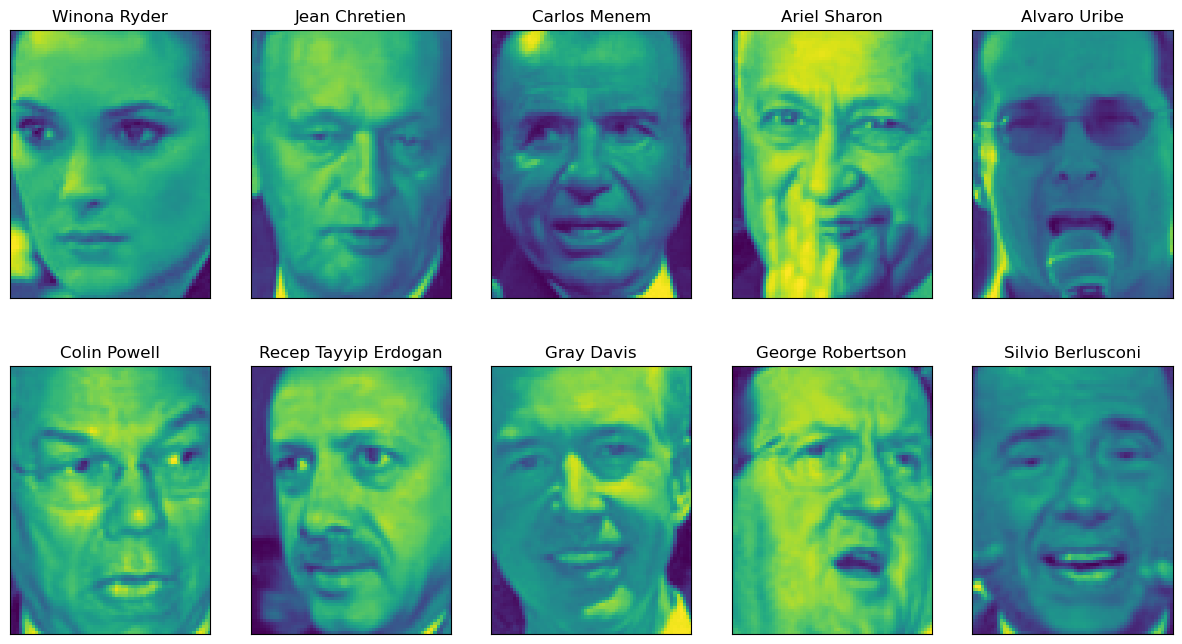

In [24]:
#人脸集
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

image_shape = people.images[0].shape

fix,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [1]:
"what's up 怎么没保存"

"what's up 怎么没保存"